In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *

In [3]:
# Função para remover outliers usando o método IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Função para preencher valores ausentes
def valores_vazios(col):
    percentual = col.value_counts(normalize=True).to_dict()
    percent = [percentual[key] for key in percentual]
    labels = [key for key in percentual]
    
    s = pd.Series(np.random.choice(labels, p=percent, size=col.isnull().sum()), index=col.index[col.isnull()])
    col.fillna(s, inplace=True)
    
    if col.isnull().sum() > 0:
        col.fillna(value=max(percentual, key=percentual.get), inplace=True)
        
    return col

In [4]:
# Carregar os dados
data = pd.read_csv(r'..\Data\data_for_vis.csv')

# Visualizar as primeiras linhas
print(data.head())

# Remover outliers das colunas relevantes
data = remove_outliers(data, 'vgs')
data = remove_outliers(data, 'ugs')
data = remove_outliers(data, 'adts')

# Preencher valores ausentes nas colunas relevantes
data['vgs'] = valores_vazios(data['vgs'])
data['ugs'] = valores_vazios(data['ugs'])
data['adts'] = valores_vazios(data['adts'])

# Normalização dos Dados
scaler = StandardScaler()
data[['vgs', 'ugs', 'adts']] = scaler.fit_transform(data[['vgs', 'ugs', 'adts']])

# Divisão dos Dados em treino e teste
X = data[['year', 'month', 'day', 'lat', 'lon', 'vgs', 'ugs']]
y = data['adts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dados de treinamento e teste preparados.")

     year  month  day     lat      lon     vgs     ugs    adts
0  1993.0    1.0  1.0  34.125  127.625 -0.0256 -0.0160  0.5677
1  1993.0    1.0  1.0  34.125  127.875  0.0241 -0.0004  0.5649
2  1993.0    1.0  1.0  34.125  128.125  0.0721  0.0364  0.5734
3  1993.0    1.0  1.0  34.125  128.375  0.1105  0.0873  0.5841
4  1993.0    1.0  1.0  34.125  128.625  0.1525  0.1366  0.6017
Dados de treinamento e teste preparados.


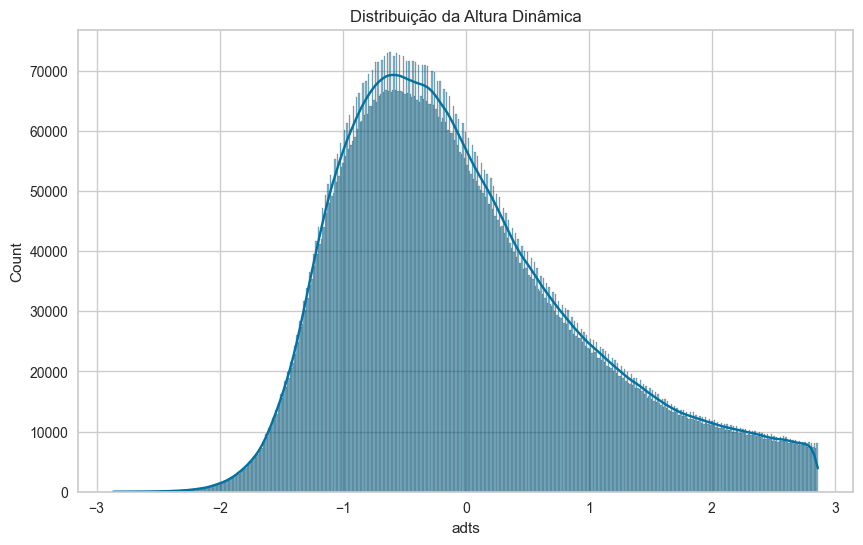

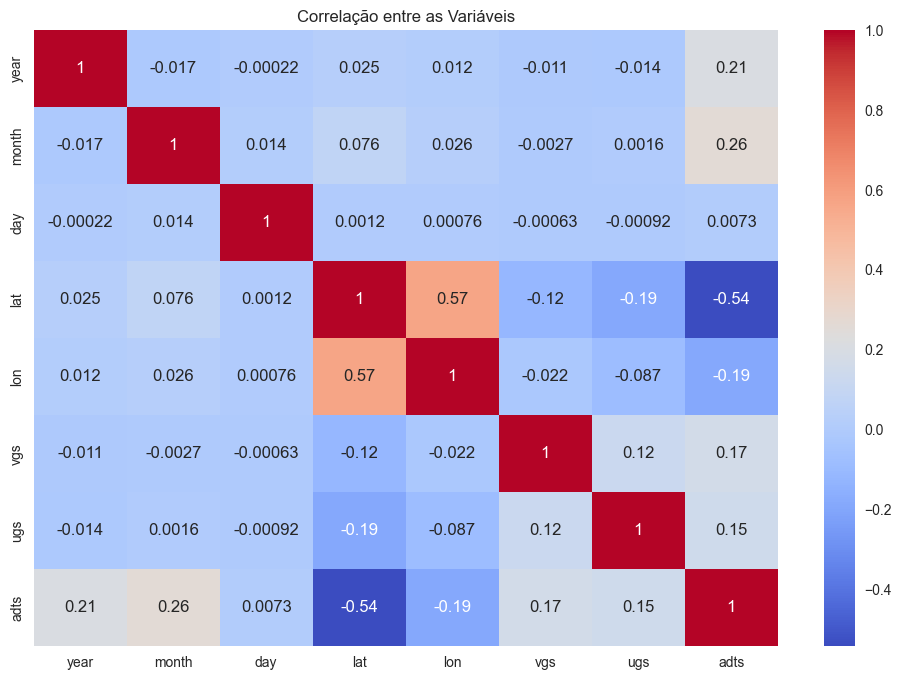

In [5]:
# Plotar a distribuição da altura dinâmica
plt.figure(figsize=(10, 6))
sns.histplot(data['adts'], kde=True)
plt.title('Distribuição da Altura Dinâmica')
plt.show()

# Correlação entre as variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as Variáveis')
plt.show()

In [6]:
# Inicializar o setup do PyCaret para prever correntes oceanicas
regression_setup = setup(data=data, target='adts', session_id=123, normalize=True, 
                         ignore_features=['year', 'month', 'day', 'lat', 'lon'])

# Comparar todos os modelos
best_model = compare_models()

# Verificar o melhor modelo
print(best_model)

metrics_df = pull()

# Exibir as métricas desejadas
print(metrics_df[['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC', 'TT (Sec)']])

,Description,Value
0,Session id,123
1,Target,adts
2,Target type,Regression
3,Original data shape,"(13752338, 8)"
4,Transformed data shape,"(13752338, 3)"
5,Transformed train set shape,"(9626636, 3)"
6,Transformed test set shape,"(4125702, 3)"
7,Ignore features,5
8,Numeric features,2
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:16:03
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.7752,0.9562,0.9779,0.0440,0.5102,2.1066,6.7770
ridge,Ridge Regression,0.7752,0.9562,0.9779,0.0440,0.5102,2.1066,2.9500
lar,Least Angle Regression,0.7752,0.9562,0.9779,0.0440,0.5102,2.1066,2.5870
br,Bayesian Ridge,0.7752,0.9562,0.9779,0.0440,0.5102,2.1065,2.5540
knn,K Neighbors Regressor,0.7627,0.9569,0.9782,0.0433,0.4067,4.7852,13.5140
omp,Orthogonal Matching Pursuit,0.7838,0.9722,0.9860,0.0280,0.5306,1.8765,3.8920
huber,Huber Regressor,0.7615,0.9747,0.9872,0.0256,0.4709,2.5651,10.3710
lasso,Lasso Regression,0.7986,1.0002,1.0001,-0.0000,0.6212,1.0005,3.1210
en,Elastic Net,0.7986,1.0002,1.0001,-0.0000,0.6212,1.0005,2.7120
llar,Lasso Least Angle Regression,0.7986,1.0002,1.0001,-0.0000,0.6212,1.0005,3.5090


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# ----------------------------------------------------------------